Start with our usual setup, including the utility methods from last time.

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def display(img, title=None):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

Optional: we'll use the OpenCV library's convolution function, which is much faster. You may need to run `pip3 install opencv-python` and restart Jupyter notebook.

In [2]:
import cv2

We'll start by reviewing the example from lecture: the iguana and the horizontal derivative.

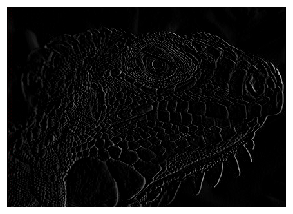

In [3]:
filter = np.array(
[
    [1,0,-1]
])

image = cv2.imread('./iguana.png')
result = cv2.filter2D(image, -1, filter)
display(result)

# Exercise 1
Let's try and address some of the problems that we found in lecture.

1. The image is dark, and it's hard to tell where the edges are that we found. How can we improve on this? Can we do this in a single filter?
2. The algorithm finds lots of edges, but we don't care about all of them. Could we keep only the brightest edges somehow? 
3. We used a horizontal derivative filter. Create and run a vertical derivative filter. Should it look similar? Does it? Find an image where the horizontal and vertical derivative filters produce very different output.
4. How does the derivative filter respond to noise? Load and run the filter on the noisy_einstein image. Can you improve on this result?


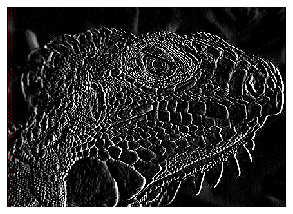

In [4]:
# brightening the image in a single filter: just multiply the filter by a scalar
brt_factor = 5
display(cv2.filter2D(image, -1, brt_factor * filter)) # second arg is the depth of the output image?

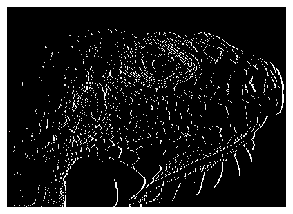

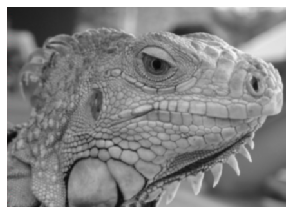

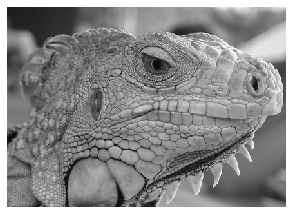

In [24]:
# keep only the brightest edges - single threshold?
new_img = cv2.filter2D(image, -1, brt_factor * filter)
thresh = 200
for i_y, y in enumerate(new_img):
    for i_x, x in enumerate(y):
        if np.mean(new_img[i_y][i_x]) < thresh:
            new_img[i_y][i_x] = [0, 0, 0]
            
display(new_img) # I mean it kind of works but its not ideal


# keep only the brightest edges - canny edge detector? https://en.wikipedia.org/wiki/Canny_edge_detector#Process_of_Canny_edge_detection_algorithm

# de noise with gaussian blur
new_img = cv2.GaussianBlur(image, (5,5), 1) # src, kernel size, sigma

# find the intensity of the gradient (so horiz and vert derivatives)
# want to find horizontal, vertical, and diagonal edges
def snap_dir(angle): # angle in range -pi to pi
    return np.radians(np.round(np.degrees(angle) / 45) * 45 % 180) 
# run an edge detection filter (sobel) to find first derivatives in the x and y directions
v_filter = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])
h_filter = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1],
])
v_derivative = cv2.filter2D(new_img, -1, v_filter)
h_derivative = cv2.filter2D(new_img, -1, h_filter)
# for each pixel, find the magnitude of the gradient and the direction of the gradient
mags = np.array(new_img.shape[0], new_img.shape(1))
dirs = mags
for i_y, y in enumerate(new_img):
    for i_x, x in enumerate(y):
        mags[i_y][i_x] = np.hypot(v_derivative[i_y][i_x], h_derivative[i_y][i_x])
        dirs[i_y][i_x] snap_dir(np.arctan2(v_derivative[i_y][i_x], h_derivative[i_y][i_x]))

display(new_img)

In [6]:
# vertical filter



In [9]:
# noise


0.0

1.5707963267948966